In [1]:
%matplotlib inline
import urllib.request 
import json, datetime, time
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 일별 박스오피스
def cineBoxInfo():
    #오늘 날짜를 가져와서 사용할 형식으로 만든다.
    movieDate=time.strftime('%Y%m%d', time.localtime(time.time()))
    
    cine=[]
    for i in range(0,30):
        #자료는 매일 갱신되며 갱신 시간이전에 요청시 내용이 비어 있음.
        #반복 함수 마지막에 날짜를 줄이는 함수를 사용한다.
        #str -> date
        datetime_obj = datetime.datetime.strptime(movieDate,"%Y%m%d").date()

        # 1일 혹은 1주일씩 시간을 줄여간다.
        datetime_obj_tmp = datetime_obj - datetime.timedelta(days=1)  #weeks=1
        
        #date -> str
        movieDate = datetime_obj_tmp.strftime("%Y%m%d")
        print(movieDate, end=" ")
                
        url = f"http://www.kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.json?key=66e652e1d2656b42f10d93c91e0295e4&targetDt={movieDate}"
        response =urllib.request.urlopen(url)
        #print(response)
        
        rescode = response.getcode()
        if(rescode == 200):
            responseData = response.read()

        result = json.loads(responseData)
        #print(result)
        pre_result = result["boxOfficeResult"]["dailyBoxOfficeList"]
        #print(pre_result)     
        
        for i in range(0,len(pre_result)):
            pre_result[i]['targetDt']=movieDate
            cine.append(pre_result[i])
      
    print()
    #list->dataframe
    dataframe=pd.DataFrame(cine)
    print(dataframe.columns)
    dataframe.to_csv("cinebox.csv", index = False)
    return dataframe

In [ ]:
# 영화상세정보
def cineInfo(movieCd):
    url = f"http://www.kobis.or.kr/kobisopenapi/webservice/rest/movie/searchMovieInfo.json?key=66e652e1d2656b42f10d93c91e0295e4&movieCd="+str(movieCd)
    response = urllib.request.urlopen(url)
    text = response.read()
    #print(text)
    d = json.loads(text)
    #print(d)
    movieInfo = d['movieInfoResult']['movieInfo']
    return movieInfo

In [ ]:
cineBoxInfo()

In [ ]:
# 영화코드를 인자로 받아 영화상세정보 리턴
movieInfo = cineInfo(20193069)
movieInfo

In [61]:
print(movieInfo['movieCd'],
      movieInfo['movieNm'],
      movieInfo['showTm'],
      len(movieInfo['actors']),
      len(movieInfo['showTypes']))

20193069 #살아있다 97 2 3


In [62]:
# 필요한 영화 코드
df = pd.read_csv(r'cinebox.csv',engine='python',encoding='utf-8')
df

,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt,targetDt
0,1,1,0,OLD,20193450,반도,2020-07-15,1183766780,87.7,-2804113320,-70.3,17065939380,141480,-301684,-68.1,1945520,2258,10778,20200720
1,2,2,0,OLD,20193069,#살아있다,2020-06-24,34586820,2.6,-37027380,-51.7,15675513340,4806,-4384,-47.7,1855485,477,1057,20200720
2,3,3,0,OLD,20204644,밤쉘: 세상을 바꾼 폭탄선언,2020-07-08,33282220,2.5,-35391720,-51.5,1218120740,4085,-3599,-46.8,143174,459,953,20200720
3,4,4,1,OLD,20200162,소년시절의 너,2020-07-09,16606000,1.2,-8469800,-33.8,286011800,2021,-808,-28.6,33373,162,303,20200720
4,5,5,1,OLD,20200845,비바리움,2020-07-16,10276380,0.8,-10257580,-50.0,80788380,1250,-1006,-44.6,9320,124,209,20200720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,6,6,0,OLD,20196702,야구소녀,2020-06-18,38904340,2.4,518120,1.3,149397880,4310,102,2.4,17096,254,401,20200621
296,7,7,0,OLD,20205481,에어로너츠,2020-06-10,31135740,1.9,-6137600,-16.5,636643960,3262,-613,-15.8,71614,256,352,20200621
297,8,8,0,OLD,20209463,나의 첫 번째 슈퍼스타,2020-06-10,21903740,1.3,-2283180,-9.4,430842560,2304,-211,-8.4,47185,182,238,20200621
298,9,9,1,OLD,20184842,아이 캔 온리 이매진,2018-06-21,9095480,0.6,1405420,18.3,228396040,1385,221,19.0,28932,131,150,20200621


In [63]:
codeitem = pd.unique(df['movieCd'])
codeitem.tolist()
print(codeitem)   

cine=[]
for code in codeitem:
    movieInfo = cineInfo(code)
    item={'movieCd':movieInfo['movieCd'],'movieNm':movieInfo['movieNm'],'showTm':movieInfo['showTm'],'actors':len(movieInfo['actors']),'showTypes':len(movieInfo['showTypes'])}
    cine.append(item)
    
dataframe=pd.DataFrame(cine)
dataframe.to_csv("cine.csv",index = False)         

[20193450 20193069 20204644 20200162 20200845 20191048 20209882 20183813
 20112561 20201841 20188364 19888010 20209961 20208983 20201421 20200749
 20112703 20196201 20193263 20208182 20179462 20081056 20208617 20200802
 20200836 20200361 20200083 20196702 20200846 20050112 20193859 20209644
 20197863 20178522 20090161 20208828 20198890 20205481 20209463 20195483
 20184842]


In [69]:
def graph_m(title):
    df = pd.read_csv(r'cinebox.csv',engine='python',encoding='utf-8')
#     print(df.head())
#     print('-'*60)
#     #df=df.drop('Unnamed: 0',axis=1)  # 불러온 컬럼중 제거할 컬럼이 있다면 제거한다.
#     df.drop('rnum',axis=1,inplace=True)
#     print(df.head())
#     print(df.columns)
    temp = df[df['movieNm'] == title]
#     print(temp[['salesAmt','targetDt','movieNm']])
#     print(temp.dtypes)
    temp.sort_values('targetDt',inplace=True)
    mpl.rc('font', family='NanumBarunGothic') #한글 폰트 설정
    plt.bar(temp['targetDt'].astype(str),temp['salesAmt']) 
    plt.title('일별 매출액 막대 그래프')
    plt.xlabel('날짜')
    plt.ylabel('총매출액')
    plt.xticks(fontsize=10, rotation=90)
    url1="" + title + ".png"
    plt.savefig(url1)

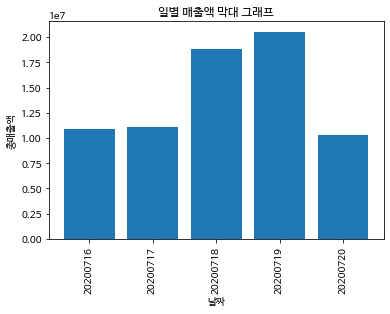

In [70]:
graph_m("비바리움")

In [2]:
df = pd.read_csv(r'cinebox.csv',engine='python',encoding='utf-8')
df.head()

,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt,targetDt
0,1,1,0,OLD,20193450,반도,2020-07-15,1183766780,87.7,-2804113320,-70.3,17065939380,141480,-301684,-68.1,1945520,2258,10778,20200720
1,2,2,0,OLD,20193069,#살아있다,2020-06-24,34586820,2.6,-37027380,-51.7,15675513340,4806,-4384,-47.7,1855485,477,1057,20200720
2,3,3,0,OLD,20204644,밤쉘: 세상을 바꾼 폭탄선언,2020-07-08,33282220,2.5,-35391720,-51.5,1218120740,4085,-3599,-46.8,143174,459,953,20200720
3,4,4,1,OLD,20200162,소년시절의 너,2020-07-09,16606000,1.2,-8469800,-33.8,286011800,2021,-808,-28.6,33373,162,303,20200720
4,5,5,1,OLD,20200845,비바리움,2020-07-16,10276380,0.8,-10257580,-50.0,80788380,1250,-1006,-44.6,9320,124,209,20200720


In [3]:
df['movieNm'] == '반도'

0       True
1      False
2      False
3      False
4      False
       ...  
295    False
296    False
297    False
298    False
299    False
Name: movieNm, Length: 300, dtype: bool

In [6]:
temp1 = df[df['movieNm'] == '밤쉘: 세상을 바꾼 폭탄선언']
temp1.head()

,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt,targetDt
2,3,3,0,OLD,20204644,밤쉘: 세상을 바꾼 폭탄선언,2020-07-08,33282220,2.5,-35391720,-51.5,1218120740,4085,-3599,-46.8,143174,459,953,20200720
12,3,3,0,OLD,20204644,밤쉘: 세상을 바꾼 폭탄선언,2020-07-08,68673940,1.6,-7192400,-9.5,1184838520,7684,-641,-7.7,139089,418,745,20200719
22,3,3,0,OLD,20204644,밤쉘: 세상을 바꾼 폭탄선언,2020-07-08,75866340,1.5,30718920,68.0,1116164580,8325,3256,64.2,131405,431,766,20200718
32,3,3,1,OLD,20204644,밤쉘: 세상을 바꾼 폭탄선언,2020-07-08,45147420,1.7,13405040,42.2,1040298240,5069,1144,29.1,123080,421,815,20200717
43,4,4,0,OLD,20204644,밤쉘: 세상을 바꾼 폭탄선언,2020-07-08,31742380,1.6,-1984240,-5.9,995150820,3925,-263,-6.3,118011,416,786,20200716


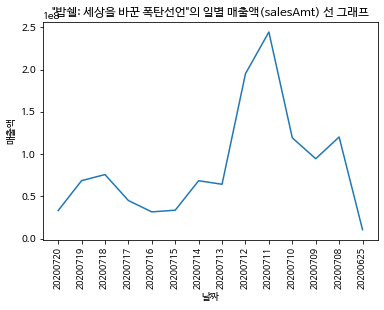

In [7]:

mpl.rc('font', family='NanumBarunGothic') #한글 폰트 설정
plt.plot([str(x) for x in temp1['targetDt']], temp1['salesAmt'])
plt.title('"{}"의 일별 매출액(salesAmt) 선 그래프'.format(temp1.iloc[0,5]))
plt.xlabel('날짜')
plt.ylabel('매출액')
plt.xticks(fontsize=9, rotation=90)
plt.show()

In [21]:
temp1.iloc[0,5]

'반도'

In [9]:
temp = df.groupby('movieNm').sum()
temp

,rnum,rank,rankInten,movieCd,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt,targetDt
movieNm,,,,,,,,,,,,,,,,
#살아있다,41,41,6,565405932,15662346340,1174.0,34586820,52417.1,322540302900,1852718,4806,16445.4,38433614,32250,131016,565619222
BIFAN2020 판타스틱 단편 걸작선 1,45,45,9,141409947,113400000,11.3,17400000,279.7,455400000,18900,2900,279.7,75900,37,167,141404991
결백,107,107,-7,605514390,3103824500,294.9,-535654700,28.9,204145023400,363352,-57504,-20.3,23029128,14653,37991,606020465
그레텔과 헨젤,33,33,-4,80832728,69832560,10.5,22450140,132.3,217926800,7998,2463,123.3,24261,1232,1953,80802838
나의 첫 번째 슈퍼스타,16,16,0,40418926,27310460,2.7,-18780200,-84.7,867091840,2965,-1854,-79.7,95031,324,423,40401243
너와 파도를 탈 수 있다면,39,39,1,80773052,40839580,6.8,-1257900,55.6,222512120,4806,125,59.8,25457,876,1114,80802847
다크 나이트,30,30,0,140567392,364168980,43.9,34007920,99.4,196048670220,46289,4288,98.3,29422002,2502,4065,141404928
다크 나이트 라이즈,31,31,-1,140788921,232635620,36.0,18218920,68.2,334766163460,28831,2318,72.8,44922424,2070,3434,141404977
맛있는 녀석들,14,14,18,40376728,21967080,0.5,11974760,1005.1,34074400,2694,1455,965.0,4223,297,347,40401437


In [23]:
temp = df.groupby('movieNm').count()
temp

,rnum,rank,rankInten,rankOldAndNew,movieCd,openDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt,targetDt
movieNm,,,,,,,,,,,,,,,,,,
#살아있다,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28
BIFAN2020 판타스틱 단편 걸작선 1,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
결백,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
그레텔과 헨젤,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
나의 첫 번째 슈퍼스타,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
너와 파도를 탈 수 있다면,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
다크 나이트,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
다크 나이트 라이즈,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
맛있는 녀석들,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


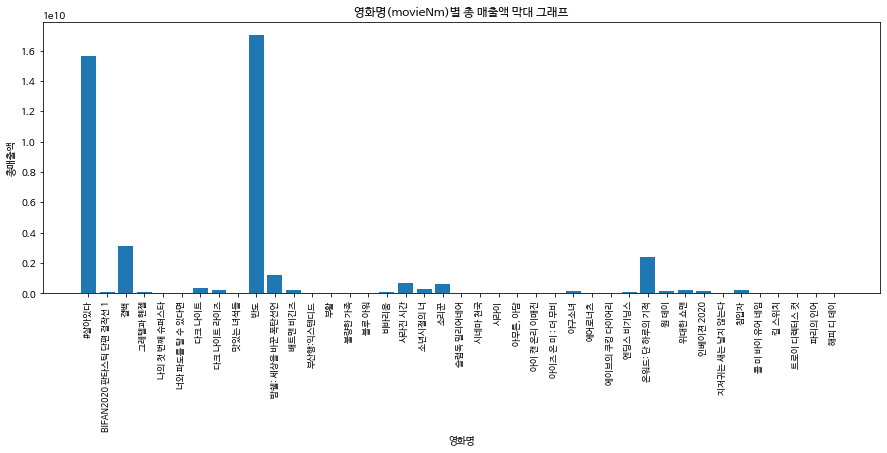

In [10]:
mpl.rc('font', family='NanumBarunGothic') #한글 폰트 설정
plt.figure(figsize=(15, 5))
plt.bar(temp.index, temp['salesAmt']) 
plt.title('영화명(movieNm)별 총 매출액 막대 그래프')
plt.xlabel('영화명')
plt.ylabel('총매출액')
plt.xticks(fontsize=9, rotation=90)
plt.show()

- 분포도 그리기

In [11]:
df = pd.read_csv(r'cinebox.csv',engine='python',encoding='utf-8')
temp = df.groupby('movieNm').sum()
temp.head()

,rnum,rank,rankInten,movieCd,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt,targetDt
movieNm,,,,,,,,,,,,,,,,
#살아있다,41,41,6,565405932,15662346340,1174.0,34586820,52417.1,322540302900,1852718,4806,16445.4,38433614,32250,131016,565619222
BIFAN2020 판타스틱 단편 걸작선 1,45,45,9,141409947,113400000,11.3,17400000,279.7,455400000,18900,2900,279.7,75900,37,167,141404991
결백,107,107,-7,605514390,3103824500,294.9,-535654700,28.9,204145023400,363352,-57504,-20.3,23029128,14653,37991,606020465
그레텔과 헨젤,33,33,-4,80832728,69832560,10.5,22450140,132.3,217926800,7998,2463,123.3,24261,1232,1953,80802838
나의 첫 번째 슈퍼스타,16,16,0,40418926,27310460,2.7,-18780200,-84.7,867091840,2965,-1854,-79.7,95031,324,423,40401243


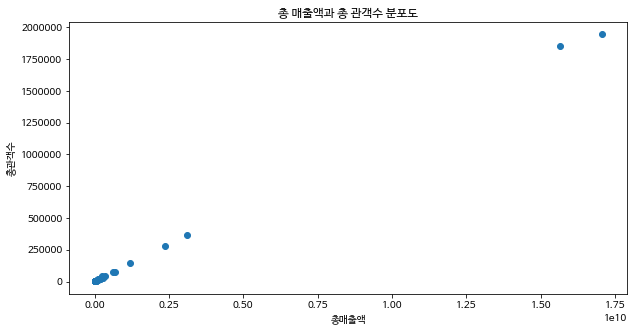

In [12]:
mpl.rc('font', family='NanumBarunGothic') #한글 폰트 설정
plt.figure(figsize=(10, 5))
# plt.scatter(temp['salesAmt'], temp['audiCnt']) 
plt.scatter(temp['salesAmt'], temp['audiCnt']) 
plt.title('총 매출액과 총 관객수 분포도')
plt.xlabel('총매출액')
plt.ylabel('총관객수')
plt.show()

- 파이차트 그리기

In [27]:
df = pd.read_csv(r'cinebox.csv',engine='python',encoding='utf-8')
temp = df.groupby('movieNm').sum()
temp = temp.sort_values(by='salesAmt', ascending=0)
temp = temp.iloc[:10]
temp

,rnum,rank,rankInten,movieCd,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt,targetDt
movieNm,,,,,,,,,,,,,,,,
반도,15,15,10,141354150,17062149380,555.9,1193156780,462.5,59854734740,1945150,142674,691.2,6889821,14536,74176,141405014
#살아있다,41,41,6,565405932,15662346340,1174.0,34586820,52417.1,322540302900,1852718,4806,16445.4,38433614,32250,131016,565619222
결백,107,107,-7,605514390,3103824500,294.9,-535654700,28.9,204145023400,363352,-57504,-20.3,23029128,14653,37991,606020465
온워드: 단 하루의 기적,130,130,-4,605731440,2379921480,193.7,-459388200,534.1,81333040660,281109,-49906,514.2,9357171,13188,29785,606020465
밤쉘: 세상을 바꾼 폭탄선언,44,44,-1,282865016,1205747340,142.1,44000220,221.3,10462763900,141766,5295,194.4,1240940,8241,22538,282809907
사라진 시간,44,44,-2,201938590,674598520,66.2,-399051860,-131.3,15011637800,77702,-42333,-148.3,1673804,5249,12039,202006255
소리꾼,80,80,0,302943015,623098260,78.4,26627520,499.1,6299828580,76559,3176,479.5,774541,5764,13385,303010528
다크 나이트,30,30,0,140567392,364168980,43.9,34007920,99.4,196048670220,46289,4288,98.3,29422002,2502,4065,141404928
소년시절의 너,59,59,-1,242401944,271827800,30.4,16606000,119.8,2199200200,31207,2021,113.0,258154,2159,4189,242408574


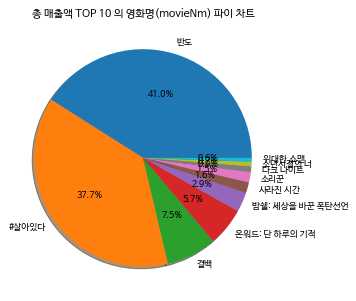

In [28]:
mpl.rc('font', family='NanumBarunGothic') #한글 폰트 설정
mpl.rcParams['font.size'] = 9
plt.figure(figsize=(10, 5))
plt.pie(temp['salesAmt'], labels=temp.index, autopct='%.1f%%', shadow=True)
plt.title('총 매출액 TOP 10 의 영화명(movieNm) 파이 차트')
plt.show()

In [13]:
df1 = pd.read_csv(r'cinebox.csv',engine='python',encoding='utf-8')
df1

,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt,targetDt
0,1,1,0,OLD,20193450,반도,2020-07-15,1183766780,87.7,-2804113320,-70.3,17065939380,141480,-301684,-68.1,1945520,2258,10778,20200720
1,2,2,0,OLD,20193069,#살아있다,2020-06-24,34586820,2.6,-37027380,-51.7,15675513340,4806,-4384,-47.7,1855485,477,1057,20200720
2,3,3,0,OLD,20204644,밤쉘: 세상을 바꾼 폭탄선언,2020-07-08,33282220,2.5,-35391720,-51.5,1218120740,4085,-3599,-46.8,143174,459,953,20200720
3,4,4,1,OLD,20200162,소년시절의 너,2020-07-09,16606000,1.2,-8469800,-33.8,286011800,2021,-808,-28.6,33373,162,303,20200720
4,5,5,1,OLD,20200845,비바리움,2020-07-16,10276380,0.8,-10257580,-50.0,80788380,1250,-1006,-44.6,9320,124,209,20200720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,6,6,0,OLD,20196702,야구소녀,2020-06-18,38904340,2.4,518120,1.3,149397880,4310,102,2.4,17096,254,401,20200621
296,7,7,0,OLD,20205481,에어로너츠,2020-06-10,31135740,1.9,-6137600,-16.5,636643960,3262,-613,-15.8,71614,256,352,20200621
297,8,8,0,OLD,20209463,나의 첫 번째 슈퍼스타,2020-06-10,21903740,1.3,-2283180,-9.4,430842560,2304,-211,-8.4,47185,182,238,20200621
298,9,9,1,OLD,20184842,아이 캔 온리 이매진,2018-06-21,9095480,0.6,1405420,18.3,228396040,1385,221,19.0,28932,131,150,20200621


In [14]:
df2 = pd.read_csv(r'cine.csv',engine='python',encoding='utf-8')
df2

,movieCd,movieNm,showTm,actors,showTypes
0,20193450,반도,115,8,5
1,20193069,#살아있다,97,2,3
2,20204644,밤쉘: 세상을 바꾼 폭탄선언,108,3,1
3,20200162,소년시절의 너,135,1,1
4,20200845,비바리움,97,2,1
5,20191048,온워드: 단 하루의 기적,102,4,5
6,20209882,블루 아워,91,6,1
7,20183813,결백,110,11,2
8,20112561,원 데이,107,2,2
9,20201841,부활,110,0,1


In [15]:
df3 = pd.merge(df1, df2, on='movieCd') 
df3

,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm_x,openDt,salesAmt,salesShare,salesInten,...,audiInten,audiChange,audiAcc,scrnCnt,showCnt,targetDt,movieNm_y,showTm,actors,showTypes
0,1,1,0,OLD,20193450,반도,2020-07-15,1183766780,87.7,-2804113320,...,-301684,-68.1,1945520,2258,10778,20200720,반도,115,8,5
1,1,1,0,OLD,20193450,반도,2020-07-15,3987880100,92.5,-675594160,...,-73382,-14.2,1804040,2541,13353,20200719,반도,115,8,5
2,1,1,0,OLD,20193450,반도,2020-07-15,4663474260,93.7,2250704300,...,250733,94.3,1360876,2575,13769,20200718,반도,115,8,5
3,1,1,0,OLD,20193450,반도,2020-07-15,2412769960,93.3,542405420,...,42070,18.8,844330,2457,12598,20200717,반도,115,8,5
4,1,1,0,OLD,20193450,반도,2020-07-15,1870364540,91.6,-1061539200,...,-129267,-36.6,578517,2358,11846,20200716,반도,115,8,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,7,7,0,OLD,20205481,에어로너츠,2020-06-10,31135740,1.9,-6137600,...,-613,-15.8,71614,256,352,20200621,에어로너츠,100,3,1
296,8,8,0,OLD,20209463,나의 첫 번째 슈퍼스타,2020-06-10,5406720,1.4,-16497020,...,-1643,-71.3,47846,142,185,20200622,나의 첫 번째 슈퍼스타,113,2,1
297,8,8,0,OLD,20209463,나의 첫 번째 슈퍼스타,2020-06-10,21903740,1.3,-2283180,...,-211,-8.4,47185,182,238,20200621,나의 첫 번째 슈퍼스타,113,2,1
298,10,10,0,NEW,20195483,에이브의 쿠킹 다이어리,2020-06-24,3605000,0.9,3605000,...,457,100.0,1120,3,3,20200622,에이브의 쿠킹 다이어리,86,2,1


In [32]:
df3['rankOldAndNew'].replace(['OLD','NEW'],[0,1], inplace=True)
# df3=df3['rankOldAndNew'].replace(['OLD','NEW'],[0,1])

In [33]:
df3

,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm_x,openDt,salesAmt,salesShare,salesInten,...,audiInten,audiChange,audiAcc,scrnCnt,showCnt,targetDt,movieNm_y,showTm,actors,showTypes
0,1,1,0,0,20193450,반도,2020-07-15,1183766780,87.7,-2804113320,...,-301684,-68.1,1945520,2258,10778,20200720,반도,115,8,5
1,1,1,0,0,20193450,반도,2020-07-15,3987880100,92.5,-675594160,...,-73382,-14.2,1804040,2541,13353,20200719,반도,115,8,5
2,1,1,0,0,20193450,반도,2020-07-15,4663474260,93.7,2250704300,...,250733,94.3,1360876,2575,13769,20200718,반도,115,8,5
3,1,1,0,0,20193450,반도,2020-07-15,2412769960,93.3,542405420,...,42070,18.8,844330,2457,12598,20200717,반도,115,8,5
4,1,1,0,0,20193450,반도,2020-07-15,1870364540,91.6,-1061539200,...,-129267,-36.6,578517,2358,11846,20200716,반도,115,8,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,7,7,0,0,20205481,에어로너츠,2020-06-10,31135740,1.9,-6137600,...,-613,-15.8,71614,256,352,20200621,에어로너츠,100,3,1
296,8,8,0,0,20209463,나의 첫 번째 슈퍼스타,2020-06-10,5406720,1.4,-16497020,...,-1643,-71.3,47846,142,185,20200622,나의 첫 번째 슈퍼스타,113,2,1
297,8,8,0,0,20209463,나의 첫 번째 슈퍼스타,2020-06-10,21903740,1.3,-2283180,...,-211,-8.4,47185,182,238,20200621,나의 첫 번째 슈퍼스타,113,2,1
298,10,10,0,1,20195483,에이브의 쿠킹 다이어리,2020-06-24,3605000,0.9,3605000,...,457,100.0,1120,3,3,20200622,에이브의 쿠킹 다이어리,86,2,1


In [16]:
df3=df3.loc[:,['targetDt','rank','rankOldAndNew','movieCd','salesAmt','audiCnt','showTm','actors']]
df3

,targetDt,rank,rankOldAndNew,movieCd,salesAmt,audiCnt,showTm,actors
0,20200720,1,OLD,20193450,1183766780,141480,115,8
1,20200719,1,OLD,20193450,3987880100,443164,115,8
2,20200718,1,OLD,20193450,4663474260,516546,115,8
3,20200717,1,OLD,20193450,2412769960,265813,115,8
4,20200716,1,OLD,20193450,1870364540,223743,115,8
...,...,...,...,...,...,...,...,...
295,20200621,7,OLD,20205481,31135740,3262,100,3
296,20200622,8,OLD,20209463,5406720,661,113,2
297,20200621,8,OLD,20209463,21903740,2304,113,2
298,20200622,10,NEW,20195483,3605000,457,86,2


In [17]:
#상관계수 두 변수간의 연관된 정도를 나타낸다. 두변수가 동일하면 +1, 전혀 다르면 0, 반대방향으로 동일하면 -1
temp = df3.corr()
temp

,targetDt,rank,movieCd,salesAmt,audiCnt,showTm,actors
targetDt,1.000000,-0.001032,0.014357,0.004744,-0.001198,0.107641,-0.140322
rank,-0.001032,1.000000,-0.038926,-0.394386,-0.401823,0.029273,-0.074950
movieCd,0.014357,-0.038926,1.000000,0.068833,0.068389,-0.381309,0.019033
salesAmt,0.004744,-0.394386,0.068833,1.000000,0.997792,-0.052541,0.029643
audiCnt,-0.001198,-0.401823,0.068389,0.997792,1.000000,-0.055060,0.026896
showTm,0.107641,0.029273,-0.381309,-0.052541,-0.055060,1.000000,0.098731
actors,-0.140322,-0.074950,0.019033,0.029643,0.026896,0.098731,1.000000


In [18]:
temp = temp.rename(index={'targetDt': '날짜','rank': '순위','rankOldAndNew': '신규진입여부','movieCd': '영화코드','salesAmt': '매출액','audiCnt': '관객수','showTm': '상영시간','actors': '배우 수'})
temp = temp.rename(columns={'targetDt': '날짜','rank': '순위','rankOldAndNew': '신규진입여부','movieCd': '영화코드','salesAmt': '매출액','audiCnt': '관객수','showTm': '상영시간','actors': '배우 수'})
temp

,날짜,순위,영화코드,매출액,관객수,상영시간,배우 수
날짜,1.000000,-0.001032,0.014357,0.004744,-0.001198,0.107641,-0.140322
순위,-0.001032,1.000000,-0.038926,-0.394386,-0.401823,0.029273,-0.074950
영화코드,0.014357,-0.038926,1.000000,0.068833,0.068389,-0.381309,0.019033
매출액,0.004744,-0.394386,0.068833,1.000000,0.997792,-0.052541,0.029643
관객수,-0.001198,-0.401823,0.068389,0.997792,1.000000,-0.055060,0.026896
상영시간,0.107641,0.029273,-0.381309,-0.052541,-0.055060,1.000000,0.098731
배우 수,-0.140322,-0.074950,0.019033,0.029643,0.026896,0.098731,1.000000


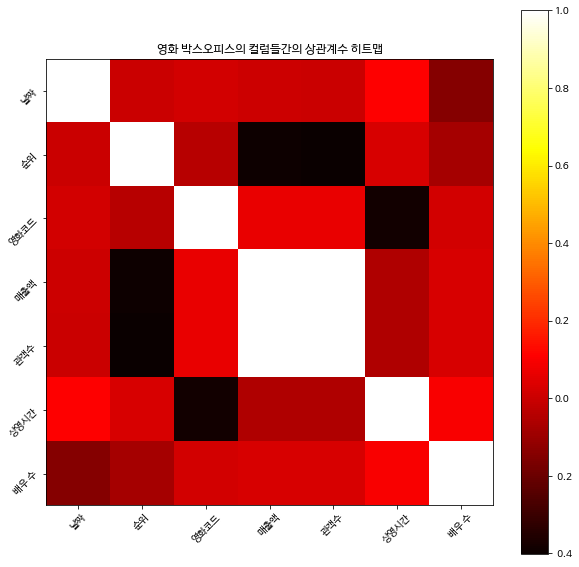

In [20]:
mpl.rc('font', family='NanumBarunGothic') #한글 폰트 설정
plt.figure(figsize=(10, 10))
plt.imshow(temp, cmap='hot')
plt.colorbar()
plt.title('영화 박스오피스의 컬럼들간의 상관계수 히트맵')
#plt.xticks(range(9), ['targetDt','rank','rankOldAndNew','movieCd','salesAmt','audiCnt','showTm','actors','showTypes'])
plt.xticks(range(len(temp.columns)), temp.columns)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(range(len(temp.index)), temp.index)
plt.yticks(fontsize=10, rotation=45)
plt.show()

In [39]:
df = pd.read_csv(r'cinebox.csv',engine='python',encoding='utf-8')
df.head()

,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt,targetDt
0,1,1,0,OLD,20193450,반도,2020-07-15,1183766780,87.7,-2804113320,-70.3,17065939380,141480,-301684,-68.1,1945520,2258,10778,20200720
1,2,2,0,OLD,20193069,#살아있다,2020-06-24,34586820,2.6,-37027380,-51.7,15675513340,4806,-4384,-47.7,1855485,477,1057,20200720
2,3,3,0,OLD,20204644,밤쉘: 세상을 바꾼 폭탄선언,2020-07-08,33282220,2.5,-35391720,-51.5,1218120740,4085,-3599,-46.8,143174,459,953,20200720
3,4,4,1,OLD,20200162,소년시절의 너,2020-07-09,16606000,1.2,-8469800,-33.8,286011800,2021,-808,-28.6,33373,162,303,20200720
4,5,5,1,OLD,20200845,비바리움,2020-07-16,10276380,0.8,-10257580,-50.0,80788380,1250,-1006,-44.6,9320,124,209,20200720


In [41]:
temp1 = df[df['movieNm'] == '반도']
temp1.head()

,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt,targetDt
0,1,1,0,OLD,20193450,반도,2020-07-15,1183766780,87.7,-2804113320,-70.3,17065939380,141480,-301684,-68.1,1945520,2258,10778,20200720
10,1,1,0,OLD,20193450,반도,2020-07-15,3987880100,92.5,-675594160,-14.5,15882172600,443164,-73382,-14.2,1804040,2541,13353,20200719
20,1,1,0,OLD,20193450,반도,2020-07-15,4663474260,93.7,2250704300,93.3,11894292500,516546,250733,94.3,1360876,2575,13769,20200718
30,1,1,0,OLD,20193450,반도,2020-07-15,2412769960,93.3,542405420,29.0,7230818240,265813,42070,18.8,844330,2457,12598,20200717
40,1,1,0,OLD,20193450,반도,2020-07-15,1870364540,91.6,-1061539200,-36.2,4818048280,223743,-129267,-36.6,578517,2358,11846,20200716


In [42]:
temp2 = df[df['movieNm'] == '#살아있다']
temp2.head()

,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt,targetDt
1,2,2,0,OLD,20193069,#살아있다,2020-06-24,34586820,2.6,-37027380,-51.7,15675513340,4806,-4384,-47.7,1855485,477,1057,20200720
11,2,2,0,OLD,20193069,#살아있다,2020-06-24,71614200,1.7,2041200,2.9,15640926520,9190,331,3.7,1850679,491,1093,20200719
21,2,2,0,OLD,20193069,#살아있다,2020-06-24,69573000,1.4,30031400,75.9,15569312320,8859,3449,63.8,1841489,485,1079,20200718
31,2,2,0,OLD,20193069,#살아있다,2020-06-24,39541600,1.5,9917360,33.5,15499739320,5410,900,20.0,1832630,480,1057,20200717
41,2,2,0,OLD,20193069,#살아있다,2020-06-24,29624240,1.5,-2993960,-9.2,15460197720,4510,-317,-6.6,1827220,465,985,20200716


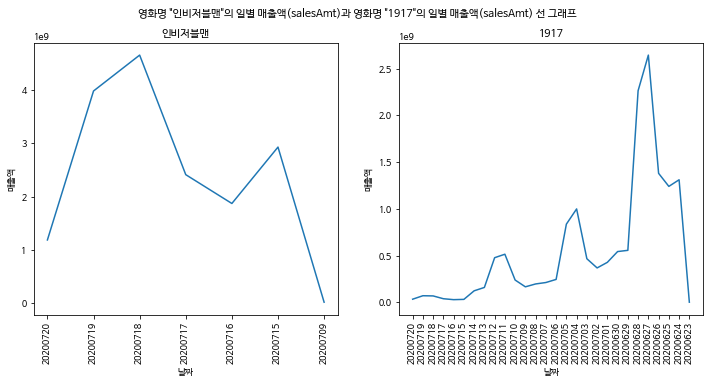

In [43]:
mpl.rc('font', family='NanumBarunGothic') #한글 폰트 설정
fig = plt.figure()
fig.set_size_inches(12,5)

#분할해 그리기 시작
axe = fig.add_subplot(1,2,1) #1행(row) 2열(column)중 첫 번째 subplot
axe.plot([str(x) for x in temp1['targetDt']], temp1['salesAmt'])
axe.set_title('인비저블맨')
axe.set_xlabel('날짜')
axe.set_ylabel('매출액')
for tick in axe.xaxis.get_major_ticks():
    tick.label.set_fontsize(9) 
    tick.label.set_rotation(90)
    
axe = fig.add_subplot(1,2,2) #1행(row) 2열(column)중 두번째 subplot
axe.plot([str(x) for x in temp2['targetDt']], temp2['salesAmt'])
axe.set_title('1917')
axe.set_xlabel('날짜')
axe.set_ylabel('매출액')
for tick in axe.xaxis.get_major_ticks():
    tick.label.set_fontsize(9) 
    tick.label.set_rotation(90)
plt.suptitle('영화명 "인비저블맨"의 일별 매출액(salesAmt)과 영화명 "1917"의 일별 매출액(salesAmt) 선 그래프')
#분할해 그리기 끝
plt.show()

In [21]:
df = pd.read_csv(r'cinebox.csv',engine='python',encoding='utf-8')
df.head()

,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt,targetDt
0,1,1,0,OLD,20193450,반도,2020-07-15,1183766780,87.7,-2804113320,-70.3,17065939380,141480,-301684,-68.1,1945520,2258,10778,20200720
1,2,2,0,OLD,20193069,#살아있다,2020-06-24,34586820,2.6,-37027380,-51.7,15675513340,4806,-4384,-47.7,1855485,477,1057,20200720
2,3,3,0,OLD,20204644,밤쉘: 세상을 바꾼 폭탄선언,2020-07-08,33282220,2.5,-35391720,-51.5,1218120740,4085,-3599,-46.8,143174,459,953,20200720
3,4,4,1,OLD,20200162,소년시절의 너,2020-07-09,16606000,1.2,-8469800,-33.8,286011800,2021,-808,-28.6,33373,162,303,20200720
4,5,5,1,OLD,20200845,비바리움,2020-07-16,10276380,0.8,-10257580,-50.0,80788380,1250,-1006,-44.6,9320,124,209,20200720


In [22]:
temp1 = df[df['movieNm'] == '반도']
temp1.head()

,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt,targetDt
0,1,1,0,OLD,20193450,반도,2020-07-15,1183766780,87.7,-2804113320,-70.3,17065939380,141480,-301684,-68.1,1945520,2258,10778,20200720
10,1,1,0,OLD,20193450,반도,2020-07-15,3987880100,92.5,-675594160,-14.5,15882172600,443164,-73382,-14.2,1804040,2541,13353,20200719
20,1,1,0,OLD,20193450,반도,2020-07-15,4663474260,93.7,2250704300,93.3,11894292500,516546,250733,94.3,1360876,2575,13769,20200718
30,1,1,0,OLD,20193450,반도,2020-07-15,2412769960,93.3,542405420,29.0,7230818240,265813,42070,18.8,844330,2457,12598,20200717
40,1,1,0,OLD,20193450,반도,2020-07-15,1870364540,91.6,-1061539200,-36.2,4818048280,223743,-129267,-36.6,578517,2358,11846,20200716


In [23]:
temp2 = df[df['movieNm'] == '#살아있다']
temp2.head()

,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt,targetDt
1,2,2,0,OLD,20193069,#살아있다,2020-06-24,34586820,2.6,-37027380,-51.7,15675513340,4806,-4384,-47.7,1855485,477,1057,20200720
11,2,2,0,OLD,20193069,#살아있다,2020-06-24,71614200,1.7,2041200,2.9,15640926520,9190,331,3.7,1850679,491,1093,20200719
21,2,2,0,OLD,20193069,#살아있다,2020-06-24,69573000,1.4,30031400,75.9,15569312320,8859,3449,63.8,1841489,485,1079,20200718
31,2,2,0,OLD,20193069,#살아있다,2020-06-24,39541600,1.5,9917360,33.5,15499739320,5410,900,20.0,1832630,480,1057,20200717
41,2,2,0,OLD,20193069,#살아있다,2020-06-24,29624240,1.5,-2993960,-9.2,15460197720,4510,-317,-6.6,1827220,465,985,20200716


In [25]:
dates = list(set(temp1['targetDt']) | set(temp2['targetDt']))
dates.sort()
print(dates)
len(dates)

[20200623, 20200624, 20200625, 20200626, 20200627, 20200628, 20200629, 20200630, 20200701, 20200702, 20200703, 20200704, 20200705, 20200706, 20200707, 20200708, 20200709, 20200710, 20200711, 20200712, 20200713, 20200714, 20200715, 20200716, 20200717, 20200718, 20200719, 20200720]


28

In [26]:
def apply_temp1(date):
    return dates.index(date)

In [28]:
apply_temp1(20200623)

0

In [29]:
temp1['x'] = temp1['targetDt'].apply(apply_temp1)
temp1.head()

,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt,targetDt,x
0,1,1,0,OLD,20193450,반도,2020-07-15,1183766780,87.7,-2804113320,-70.3,17065939380,141480,-301684,-68.1,1945520,2258,10778,20200720,27
10,1,1,0,OLD,20193450,반도,2020-07-15,3987880100,92.5,-675594160,-14.5,15882172600,443164,-73382,-14.2,1804040,2541,13353,20200719,26
20,1,1,0,OLD,20193450,반도,2020-07-15,4663474260,93.7,2250704300,93.3,11894292500,516546,250733,94.3,1360876,2575,13769,20200718,25
30,1,1,0,OLD,20193450,반도,2020-07-15,2412769960,93.3,542405420,29.0,7230818240,265813,42070,18.8,844330,2457,12598,20200717,24
40,1,1,0,OLD,20193450,반도,2020-07-15,1870364540,91.6,-1061539200,-36.2,4818048280,223743,-129267,-36.6,578517,2358,11846,20200716,23


In [30]:
def apply_temp2(date):
    return dates.index(date)
temp2['x'] = temp2['targetDt'].apply(apply_temp2)
temp2.head()

,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt,targetDt,x
1,2,2,0,OLD,20193069,#살아있다,2020-06-24,34586820,2.6,-37027380,-51.7,15675513340,4806,-4384,-47.7,1855485,477,1057,20200720,27
11,2,2,0,OLD,20193069,#살아있다,2020-06-24,71614200,1.7,2041200,2.9,15640926520,9190,331,3.7,1850679,491,1093,20200719,26
21,2,2,0,OLD,20193069,#살아있다,2020-06-24,69573000,1.4,30031400,75.9,15569312320,8859,3449,63.8,1841489,485,1079,20200718,25
31,2,2,0,OLD,20193069,#살아있다,2020-06-24,39541600,1.5,9917360,33.5,15499739320,5410,900,20.0,1832630,480,1057,20200717,24
41,2,2,0,OLD,20193069,#살아있다,2020-06-24,29624240,1.5,-2993960,-9.2,15460197720,4510,-317,-6.6,1827220,465,985,20200716,23


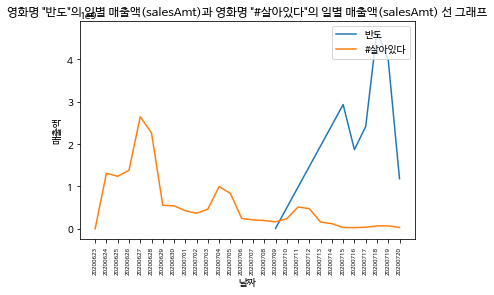

In [33]:
mpl.rc('font', family='NanumBarunGothic') #한글 폰트 설정
plt.plot(temp1['x'], temp1['salesAmt'],label='반도')
plt.plot(temp2['x'], temp2['salesAmt'],label='#살아있다')
plt.title('영화명 "{}"의 일별 매출액(salesAmt)과 영화명 "{}"의 일별 매출액(salesAmt) 선 그래프'.format('반도','#살아있다'))
plt.xlabel('날짜')
plt.ylabel('매출액')
plt.xticks(range(len(dates)),dates, fontsize=6, rotation=90)
plt.legend(loc=1) #범례
plt.show()